In [1]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from utils import load_data
import math
%matplotlib inline

# Data descriptive analysis

In [97]:
data_dir = '../data/'
data = pd.read_csv(data_dir + 'data.csv', parse_dates = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d'])

/Users/lin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
Counter(data.loan_status)

Counter({'Charged Off': 154055,
         'Default': 225,
         'Fully Paid': 601936,
         'In Grace Period': 14984,
         'Late (16-30 days)': 6684,
         'Late (31-120 days)': 24782})

(array([   3911.,    7944.,   13241.,   26536.,   59031.,  107673.,
         150326.,  123446.,   79574.,   30254.]),
 array([ 733439. ,  733752.4,  734065.8,  734379.2,  734692.6,  735006. ,
         735319.4,  735632.8,  735946.2,  736259.6,  736573. ]),
 <a list of 10 Patch objects>)

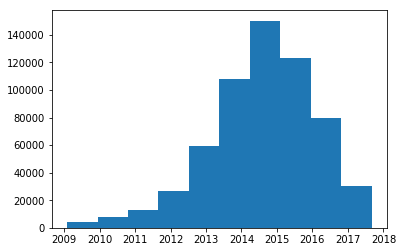

In [18]:
paid_dates = data[data.loan_status == 'Fully Paid'].issue_d.tolist()
plt.hist(paid_dates)

(array([   566.,   1202.,   2186.,   5298.,  11251.,  21127.,  38723.,
         44636.,  25968.,   3098.]),
 array([ 733439. ,  733752.4,  734065.8,  734379.2,  734692.6,  735006. ,
         735319.4,  735632.8,  735946.2,  736259.6,  736573. ]),
 <a list of 10 Patch objects>)

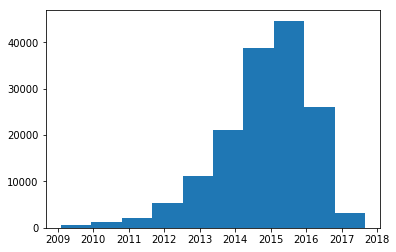

In [19]:
charged_dates = data[data.loan_status == 'Charged Off'].issue_d.tolist()
plt.hist(charged_dates)

(array([  2.,   2.,   9.,  15.,  29.,  49.,  43.,  22.,  39.,  15.]),
 array([ 734959. ,  735111.2,  735263.4,  735415.6,  735567.8,  735720. ,
         735872.2,  736024.4,  736176.6,  736328.8,  736481. ]),
 <a list of 10 Patch objects>)

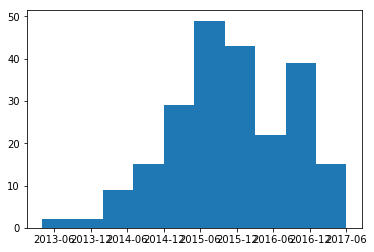

In [20]:
default_dates = data[data.loan_status == 'Default'].issue_d.tolist()
plt.hist(default_dates)

(array([   62.,   191.,   346.,   814.,  2518.,  4815.,  7464.,  5863.,
         6668.,  2725.]),
 array([ 734747. ,  734929.6,  735112.2,  735294.8,  735477.4,  735660. ,
         735842.6,  736025.2,  736207.8,  736390.4,  736573. ]),
 <a list of 10 Patch objects>)

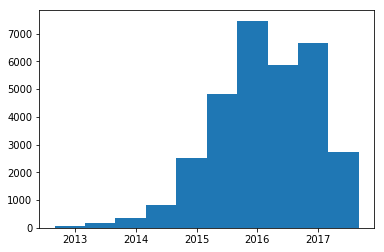

In [21]:
late_dates = data[data.loan_status.str.contains('Late')].issue_d.tolist()
plt.hist(late_dates)

(array([   48.,    90.,   187.,   304.,  1358.,  2059.,  3154.,  2743.,
         2722.,  2319.]),
 array([ 734777. ,  734956.6,  735136.2,  735315.8,  735495.4,  735675. ,
         735854.6,  736034.2,  736213.8,  736393.4,  736573. ]),
 <a list of 10 Patch objects>)

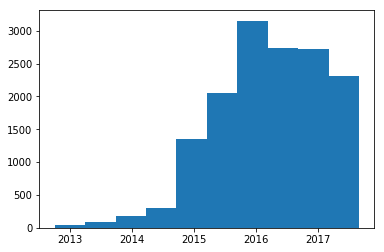

In [22]:
grace_dates = data[data.loan_status.str.contains('Grace')].issue_d.tolist()
plt.hist(grace_dates)

In [23]:
data['return'] = (data.total_pymnt - data.funded_amnt) / data.funded_amnt

(array([ 142626.,  207189.,  143803.,   66580.,   24203.,    9584.,
           4229.,    2309.,    1103.,     310.]),
 array([ 0.        ,  0.07598192,  0.15196383,  0.22794575,  0.30392767,
         0.37990958,  0.4558915 ,  0.53187342,  0.60785534,  0.68383725,
         0.75981917]),
 <a list of 10 Patch objects>)

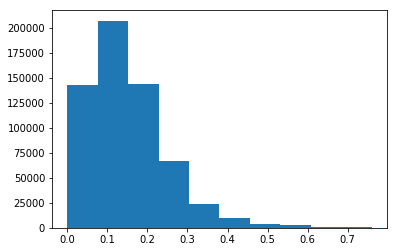

In [28]:
paid_rets = data[data.loan_status == 'Fully Paid']['return'].tolist()
plt.hist(paid_rets)

(array([  2.26480000e+04,   5.18230000e+04,   4.07840000e+04,
          2.34530000e+04,   1.14740000e+04,   3.54100000e+03,
          3.06000000e+02,   2.50000000e+01,   0.00000000e+00,
          1.00000000e+00]),
 array([-1.     , -0.78297, -0.56594, -0.34891, -0.13188,  0.08515,
         0.30218,  0.51921,  0.73624,  0.95327,  1.1703 ]),
 <a list of 10 Patch objects>)

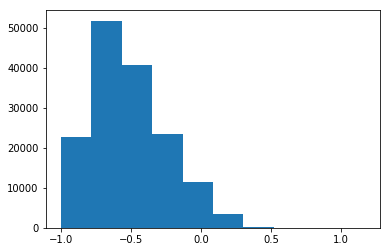

In [29]:
charged_rets = data[data.loan_status == 'Charged Off']['return'].tolist()
plt.hist(charged_rets)

(array([ 14.,  29.,  30.,  43.,  36.,  29.,  24.,   7.,   9.,   4.]),
 array([-1.        , -0.86804043, -0.73608085, -0.60412128, -0.4721617 ,
        -0.34020213, -0.20824256, -0.07628298,  0.05567659,  0.18763617,
         0.31959574]),
 <a list of 10 Patch objects>)

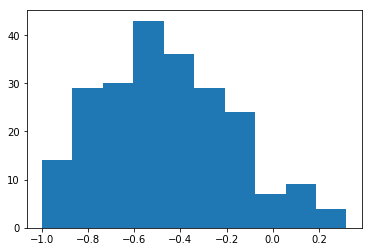

In [31]:
default_rets = data[data.loan_status == 'Default']['return'].tolist()
plt.hist(default_rets)

(array([ 3633.,  5716.,  7291.,  6638.,  4095.,  2532.,  1163.,   304.,
           81.,    13.]),
 array([-1.        , -0.82935192, -0.65870384, -0.48805576, -0.31740768,
        -0.1467596 ,  0.02388848,  0.19453656,  0.36518464,  0.53583272,
         0.7064808 ]),
 <a list of 10 Patch objects>)

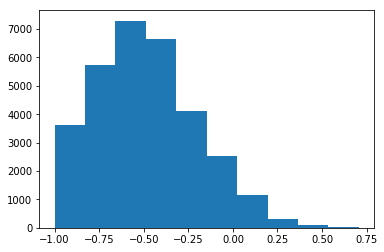

In [32]:
late_rets = data[data.loan_status.str.contains('Late')]['return'].tolist()
plt.hist(late_rets)

In [ ]:
grace_rets = data[data.loan_status.str.contains('Grace')]['return'].tolist()
plt.hist(grace_rets)

# Pure regression model

We directly fit the return of a loan during training time. After each training epoch, we run validation on the validation set: We pick top 1000 loans with highest predicted return and calculate their actual return. We save the model that achieved highest return on validation set and test its performance using the testing set.

## MSE Loss

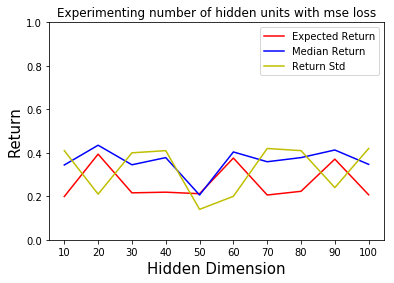

In [15]:
f = open('output/mse.out', 'r')
exp_ret = []
med_ret = []
std_ret = []
epoch = []
for line in f:
    if 'Best' in line:
        line = line.split()
        exp_ret.append(float(line[3][:-1]))
        med_ret.append(float(line[5][:-1]))
        std_ret.append(float(line[7][:-1]))
        epoch.append(int(line[10][:-1]))
f.close()
x_ticks = list(range(10))
x_value = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
fig = plt.figure()
plt.plot(x_ticks, exp_ret, label='Expected Return', color = 'r')
plt.plot(x_ticks, med_ret, label='Median Return', color = 'b')
plt.plot(x_ticks, std_ret, label='Return Std', color = 'y')
plt.xlabel('Hidden Dimension', fontsize=15)
plt.ylabel('Return', fontsize=15)
plt.xticks(x_ticks, x_value)
plt.legend(loc='best')
plt.title('Experimenting number of hidden units with mse loss')
plt.ylim([0,1])
plt.show()
#fig.savefig('mse.jpg')

In [18]:
std_ret

[0.41, 0.21, 0.4, 0.41, 0.14, 0.2, 0.42, 0.41, 0.24, 0.42]

## L1Loss

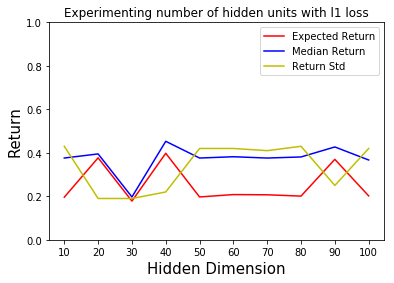

In [96]:
f = open('output/l1.out', 'r')
exp_ret = []
med_ret = []
std_ret = []
epoch = []
for line in f:
    if 'Best' in line:
        line = line.split()
        exp_ret.append(float(line[3][:-1]))
        med_ret.append(float(line[5][:-1]))
        std_ret.append(float(line[7][:-1]))
        epoch.append(int(line[10][:-1]))
f.close()
x_ticks = list(range(10))
x_value = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
fig = plt.figure()
plt.plot(x_ticks, exp_ret, label='Expected Return', color = 'r')
plt.plot(x_ticks, med_ret, label='Median Return', color = 'b')
plt.plot(x_ticks, std_ret, label='Return Std', color = 'y')
plt.xlabel('Hidden Dimension', fontsize=15)
plt.ylabel('Return', fontsize=15)
plt.xticks(x_ticks, x_value)
plt.legend(loc='best')
plt.title('Experimenting number of hidden units with l1 loss')
plt.ylim([0,1])
plt.show()
#fig.savefig('l1.jpg')

In [98]:
# Which epoch does the model get highest validation return
epoch

[193, 200, 18, 164, 171, 176, 130, 197, 124, 195]

## Testing the stability of model 

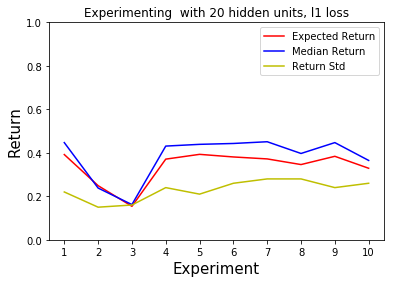

In [2]:
f = open('output/l1d20.out', 'r')
exp_ret = []
med_ret = []
std_ret = []
epoch = []
for line in f:
    if 'Best' in line:
        line = line.split()
        exp_ret.append(float(line[3][:-1]))
        med_ret.append(float(line[5][:-1]))
        std_ret.append(float(line[7][:-1]))
        epoch.append(int(line[10][:-1]))
f.close()
x_ticks = list(range(10))
x_value = list(range(1, 11))
fig = plt.figure()
plt.plot(x_ticks, exp_ret, label='Expected Return', color = 'r')
plt.plot(x_ticks, med_ret, label='Median Return', color = 'b')
plt.plot(x_ticks, std_ret, label='Return Std', color = 'y')
plt.xlabel('Experiment', fontsize=15)
plt.ylabel('Return', fontsize=15)
plt.xticks(x_ticks, x_value)
plt.legend(loc='best')
plt.title('Experimenting  with 20 hidden units, l1 loss')
plt.ylim([0,1])
plt.show()
#fig.savefig('l1.jpg')

# Pure classification model

During training time We predict the probability of default and pick the 

## Benchmark: random forest

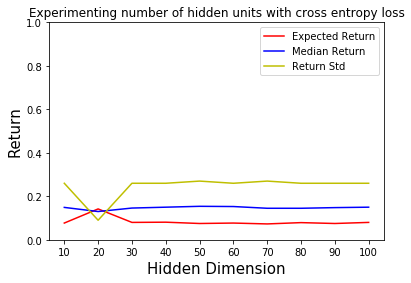

In [20]:
f = open('output/clfce.out', 'r')
exp_ret = []
med_ret = []
std_ret = []
epoch = []
for line in f:
    if 'Best' in line:
        line = line.split()
        exp_ret.append(float(line[3][:-1]))
        med_ret.append(float(line[5][:-1]))
        std_ret.append(float(line[7][:-1]))
        epoch.append(int(line[10][:-1]))
f.close()
x_ticks = list(range(10))
x_value = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
fig = plt.figure()
plt.plot(x_ticks, exp_ret, label='Expected Return', color = 'r')
plt.plot(x_ticks, med_ret, label='Median Return', color = 'b')
plt.plot(x_ticks, std_ret, label='Return Std', color = 'y')
plt.xlabel('Hidden Dimension', fontsize=15)
plt.ylabel('Return', fontsize=15)
plt.xticks(x_ticks, x_value)
plt.legend(loc='best')
plt.title('Experimenting number of hidden units with cross entropy loss')
plt.ylim([0,1])
plt.show()

In [21]:
# Under hidden dimension = 20
exp_ret[1], med_ret[1],std_ret[1]

(0.142, 0.13, 0.09)

In [22]:
exp_ret[-1], med_ret[-1],std_ret[-1]

(0.08, 0.15, 0.26)

# Classification + conditional regression

We make decision in two steps:

## question to ask: how to calculate expected return

Given a new data point, we want to calculate its expected return

In [44]:
paid_data = data[data.loan_status == 'Fully Paid']

In [76]:
instl = np.array(paid_data.installment)
term = np.array([int(item[1:3]) for item in paid_data.term])
duration = np.array((paid_data.last_pymnt_d.values.astype('datetime64[M]') - paid_data.issue_d.values.astype('datetime64[M]')) / np.timedelta64(1, 'M') )
rets = np.array((paid_data.total_pymnt - paid_data.funded_amnt) / paid_data.funded_amnt)
amnt = np.array(paid_data.funded_amnt)
inrt = np.array(paid_data.int_rate)

### Method 1: $ \text{return} = \frac{\text{term} * \text{installment} - \text{funded amount}}{\text{funded amount}}$

In [77]:
est_rets = np.divide(np.multiply(term, instl) - amnt, amnt)
diff = np.abs(est_rets - rets)
print(np.mean(diff), np.median(diff))

0.105507622915 0.0631368391071


### Method 2: $ \text{return} = \frac{\text{duration} * \text{installment} - \text{funded amount}}{\text{funded amount}}$

In [80]:
est_rets = np.divide(np.multiply(duration, instl) - amnt, amnt)
diff = np.abs(est_rets - rets)
print(np.mean(diff), np.median(diff))

0.523598849175 0.591726401152


### Method 3: $ \text{return} = \frac{\text{interest rate} * \text{duration}}{12}$ (This dependes on accurate estimation of duration)

In [79]:
est_rets = np.multiply(inrt, duration / 12)
diff = np.abs(est_rets - rets)
print(np.mean(diff), np.median(diff))

0.0647769673617 0.0351846933066


### Method 4: $ \text{return} = \frac{\text{interest rate} * \text{term}}{12}$

In [83]:
est_rets = np.multiply(inrt, term / 12)
diff = np.abs(est_rets - rets)
print(np.mean(diff), np.median(diff))

0.306026559815 0.235962506132


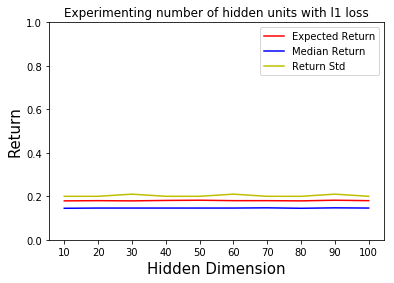

In [9]:
f = open('output/rfl1.out', 'r')
exp_ret = []
med_ret = []
std_ret = []
epoch = []
for line in f:
    if 'Best' in line:
        line = line.split()
        exp_ret.append(float(line[3][:-1]))
        med_ret.append(float(line[5][:-1]))
        std_ret.append(float(line[7][:-1]))
        epoch.append(int(line[10][:-1]))
f.close()
x_ticks = list(range(10))
x_value = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
fig = plt.figure()
plt.plot(x_ticks, exp_ret, label='Expected Return', color = 'r')
plt.plot(x_ticks, med_ret, label='Median Return', color = 'b')
plt.plot(x_ticks, std_ret, label='Return Std', color = 'y')
plt.xlabel('Hidden Dimension', fontsize=15)
plt.ylabel('Return', fontsize=15)
plt.xticks(x_ticks, x_value)
plt.legend(loc='best')
plt.title('Experimenting number of hidden units with l1 loss')
plt.ylim([0,1])
plt.show()

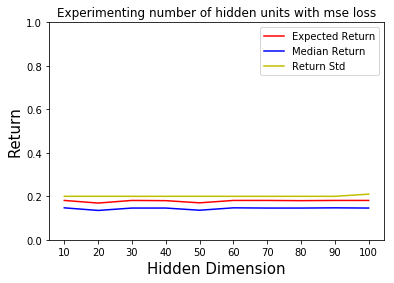

In [10]:
f = open('output/rfmse.out', 'r')
exp_ret = []
med_ret = []
std_ret = []
epoch = []
for line in f:
    if 'Best' in line:
        line = line.split()
        exp_ret.append(float(line[3][:-1]))
        med_ret.append(float(line[5][:-1]))
        std_ret.append(float(line[7][:-1]))
        epoch.append(int(line[10][:-1]))
f.close()
x_ticks = list(range(10))
x_value = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
fig = plt.figure()
plt.plot(x_ticks, exp_ret, label='Expected Return', color = 'r')
plt.plot(x_ticks, med_ret, label='Median Return', color = 'b')
plt.plot(x_ticks, std_ret, label='Return Std', color = 'y')
plt.xlabel('Hidden Dimension', fontsize=15)
plt.ylabel('Return', fontsize=15)
plt.xticks(x_ticks, x_value)
plt.legend(loc='best')
plt.title('Experimenting number of hidden units with mse loss')
plt.ylim([0,1])
plt.show()